In [ ]:
!pip install webp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.6/403.6 kB 5.8 MB/s eta 0:00:00


In [ ]:
import webp

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Lambda, Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'

MyDrive  Shareddrives


In [ ]:
train_path='/content/drive/MyDrive/Dataset/Train'
test_path='/content/drive/MyDrive/Dataset/Test'

Working with 5502 images
Image examples: 
fake_5015.jpg


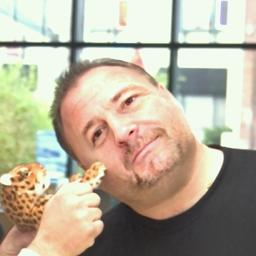

fake_72.jpg


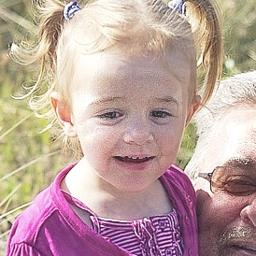

fake_978.jpg


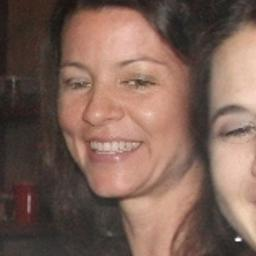

fake_5097.jpg


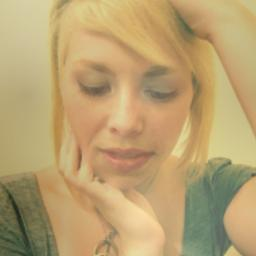

fake_871.jpg


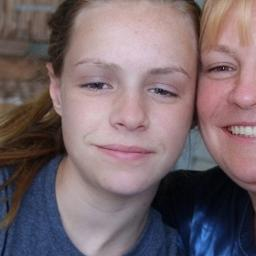

fake_601.jpg


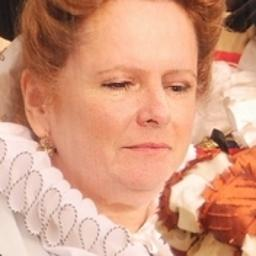

fake_5411.jpg


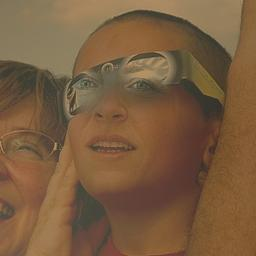

fake_5085.jpg


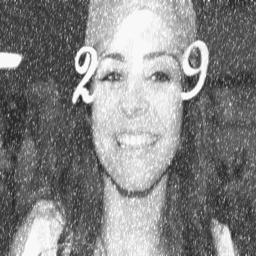

fake_783.jpg


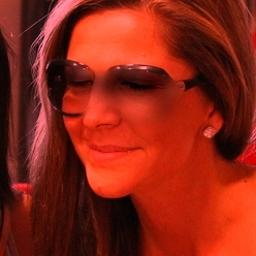

fake_676.jpg


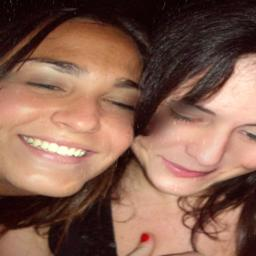

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis

folder_fake = test_path + '/Fake'

onlyfakefiles = [f for f in os.listdir(folder_fake) if os.path.join(folder_fake, f)]
print("Working with {0} images".format(len(onlyfakefiles)))
print("Image examples: ")

for filename in onlyfakefiles[:10]:  # Iterate through the first 10 files
    file_path = os.path.join(folder_fake, filename)

    if file_path.lower().endswith('.webp'):  # Check if the file is in WebP format
        # Convert WebP to JPG format
        jpg_file_path = os.path.splitext(file_path)[0] + '.jpg'
        Image.open(file_path).convert('RGB').save(jpg_file_path, 'JPEG')
        file_path = jpg_file_path  # Update file_path to point to the JPG file

    print(filename)
    display(_Imgdis(filename=file_path, width=240, height=240))


In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE +[3],weights='imagenet', include_top=False)
vgg.output

58889256/58889256 [==============================] - 4s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
  layer.trainable =False

In [ ]:
folders=glob('/content/drive/MyDrive/Dataset/Train*')
print(len(folders))

1


In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='sigmoid')(x)
model=Model(inputs=vgg.input, outputs=prediction)
model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7ea30446a320>>

In [ ]:
from keras import optimizers

adam=optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 0 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 5520 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint=ModelCheckpoint(filepath='mymodel.hS',verbose=2,save_best_only=True)

callbacks=[checkpoint]

start=datetime.now()

model_history=model.fit_generator(
    train_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=3,
    validation_steps=3,
    callbacks=callbacks,verbose=2
)

duration=datetime.now()-start
print("Training completed in time: ",duration)

<ipython-input-25-ee6a64ccd592>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


ValueError: Asked to retrieve element 0, but the Sequence has length 0